## Source: https://github.com/JeffSackmann/tennis_atp/blob/master/matches_data_dictionary.txt

In [141]:
import pandas as pd

In [142]:
df = pd.read_csv("atp_matches_2023.csv")
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,2023-M-DC-2023-WG2-PO-RSA-LUX-01,Davis Cup WG2 PO: RSA vs LUX,NaN,4,D,20230204,5,202335,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,1.0
2982,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,20230203,1,117365,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,990.0,11.0,279.0,190.0
2983,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,20230203,2,121411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,364.0,131.0,894.0,15.0
2984,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,20230203,4,144949,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,894.0,15.0,285.0,184.0


### Making a list of top 20 ATP players.
### Creating two dataframes, one for each player's wins and losses so I can have a result column with 1 and 0
### Then I'll combine the two dataframes so I have a dataset of top 20 players with each of their matches and whether they won or lost the match

In [143]:
top_20_players = ['Jannik Sinner', 'Alexander Zverev', 'Carlos Alcaraz', 'Taylor Fritz', 'Novak Djokovic', 'Casper Ruud',
                  'Jack Draper', 'Stefanos Tsitsipas', 'Andrey Rublev', 'Alex De Minaur', 'Daniil Medvedev', 'Holger Rune', 
                  'Tommy Paul', 'Ben Shelton', 'Arthur Fils', 'Lorenzo Musetti', 'Frances Tiafoe', 'Grigor Dimitrov', 
                  'Felix Auger Aliassime', 'Ugo Humbert']

# Create two dataframes: one for where top 20 players have won and one where they have lost
wins_df = df[df['winner_name'].isin(top_20_players)].copy()
losses_df = df[df['loser_name'].isin(top_20_players)].copy()

# For wins, I will first make a result column with 1 or 0, in this df all rows will have 1
wins_df['result'] = 1

#also adding the name of the player who won
wins_df['player'] = wins_df['winner_name']

#calculating rate of 1st serves won
wins_df['rate_1stWon'] = wins_df['w_1stWon'] / wins_df['w_1stIn']

#calculating rate of break points saved (stat explained in memo)
wins_df['bpSaved_rate'] = wins_df['w_bpSaved'] / wins_df['w_bpFaced']

# for every player, i also want return points stats, and these I will get from the loser's service points stats
wins_df['return_points_won'] = wins_df['l_svpt'] - wins_df['l_1stWon'] - wins_df['l_2ndWon'] #calculating how many return points they faced
wins_df['return_rate'] = wins_df['return_points_won'] / wins_df['l_svpt'] #rate of return points won by winner


#Doing the same calculation for the matches the players lost
losses_df['result'] = 0
losses_df['player'] = losses_df['loser_name']
losses_df['rate_1stWon'] = losses_df['l_1stWon'] / losses_df['l_1stIn']
losses_df['bpSaved_rate'] = losses_df['l_bpSaved'] / losses_df['l_bpFaced']
losses_df['return_points_won'] = losses_df['w_svpt'] - losses_df['w_1stWon'] - losses_df['w_2ndWon']
losses_df['return_rate'] = losses_df['return_points_won'] / losses_df['w_svpt']

#combining the two dataframes so now i have a new dataset of all top 20 players and the matches they won and lost in 2023
combined_df = pd.concat([wins_df, losses_df], ignore_index=True)

combined_df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,winner_rank,winner_rank_points,loser_rank,loser_rank_points,result,player,rate_1stWon,bpSaved_rate,return_points_won,return_rate
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,9.0,3355.0,16.0,2375.0,1,Taylor Fritz,0.865385,NaN,35.0,0.360825
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,19.0,2000.0,23.0,1865.0,1,Frances Tiafoe,0.789474,1.000000,10.0,0.476190
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,9.0,3355.0,10.0,2905.0,1,Taylor Fritz,0.880000,1.000000,24.0,0.292683
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,19.0,2000.0,245.0,220.0,1,Frances Tiafoe,0.837838,1.000000,30.0,0.441176
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,4.0,5550.0,16.0,2375.0,1,Stefanos Tsitsipas,0.826923,0.500000,23.0,0.258427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,2023-M-DC-2023-FLS-M-ITA-SRB-01,Davis Cup Finals SF: ITA vs SRB,Hard,2,D,20231125,2,206173,NaN,NaN,...,4.0,6490.0,1.0,11245.0,0,Novak Djokovic,0.760870,0.250000,40.0,0.380952
1297,2023-M-DC-2023-FLS-M-SRB-GBR-01,Davis Cup Finals QF: SRB vs GBR,Hard,2,D,20231123,1,200175,NaN,NaN,...,55.0,905.0,60.0,856.0,0,Jack Draper,0.781818,1.000000,16.0,0.216216
1298,2023-M-DC-2023-QLS-M-GER-SUI-01,Davis Cup QLS R1: GER vs SUI,Hard,4,D,20230203,4,144817,NaN,NaN,...,53.0,876.0,14.0,2425.0,0,Alexander Zverev,0.687500,0.333333,24.0,0.387097
1299,2023-M-DC-2023-WG1-M-DEN-BRA-01,Davis Cup WG1 R1: DEN vs BRA,Hard,4,D,20230915,1,106329,NaN,NaN,...,116.0,523.0,4.0,4710.0,0,Holger Rune,NaN,NaN,NaN,NaN


### Checking how many null values there are (reason for null values explained in memo)

In [144]:
null_counts = combined_df[['return_rate', 'bpSaved_rate', 'rate_1stWon']].isnull().sum()
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
return_rate      25
bpSaved_rate    115
rate_1stWon      25
dtype: int64


In [145]:
#filling null values with 0
combined_df['return_rate'] = combined_df['return_rate'].fillna(0)
combined_df['bpSaved_rate'] = combined_df['bpSaved_rate'].fillna(0)
combined_df['rate_1stWon'] = combined_df['rate_1stWon'].fillna(0)
combined_df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,winner_rank,winner_rank_points,loser_rank,loser_rank_points,result,player,rate_1stWon,bpSaved_rate,return_points_won,return_rate
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,9.0,3355.0,16.0,2375.0,1,Taylor Fritz,0.865385,0.000000,35.0,0.360825
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,19.0,2000.0,23.0,1865.0,1,Frances Tiafoe,0.789474,1.000000,10.0,0.476190
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,9.0,3355.0,10.0,2905.0,1,Taylor Fritz,0.880000,1.000000,24.0,0.292683
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,19.0,2000.0,245.0,220.0,1,Frances Tiafoe,0.837838,1.000000,30.0,0.441176
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,4.0,5550.0,16.0,2375.0,1,Stefanos Tsitsipas,0.826923,0.500000,23.0,0.258427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,2023-M-DC-2023-FLS-M-ITA-SRB-01,Davis Cup Finals SF: ITA vs SRB,Hard,2,D,20231125,2,206173,NaN,NaN,...,4.0,6490.0,1.0,11245.0,0,Novak Djokovic,0.760870,0.250000,40.0,0.380952
1297,2023-M-DC-2023-FLS-M-SRB-GBR-01,Davis Cup Finals QF: SRB vs GBR,Hard,2,D,20231123,1,200175,NaN,NaN,...,55.0,905.0,60.0,856.0,0,Jack Draper,0.781818,1.000000,16.0,0.216216
1298,2023-M-DC-2023-QLS-M-GER-SUI-01,Davis Cup QLS R1: GER vs SUI,Hard,4,D,20230203,4,144817,NaN,NaN,...,53.0,876.0,14.0,2425.0,0,Alexander Zverev,0.687500,0.333333,24.0,0.387097
1299,2023-M-DC-2023-WG1-M-DEN-BRA-01,Davis Cup WG1 R1: DEN vs BRA,Hard,4,D,20230915,1,106329,NaN,NaN,...,116.0,523.0,4.0,4710.0,0,Holger Rune,0.000000,0.000000,NaN,0.000000


In [146]:
df = combined_df

In [147]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [149]:
%%R

require('tidyverse')
require('DescTools')

## Safest logistic model with no collinearity issues

In [167]:
%%R -i df
logistic <- glm(result ~ rate_1stWon + return_rate + bpSaved_rate + winner_age + loser_age, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = result ~ rate_1stWon + return_rate + bpSaved_rate + 
    winner_age + loser_age, family = "binomial", data = df)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -10.25328    1.02185 -10.034  < 2e-16 ***
rate_1stWon    3.78424    0.91829   4.121 3.77e-05 ***
return_rate   15.86382    1.16003  13.675  < 2e-16 ***
bpSaved_rate   0.76667    0.26603   2.882  0.00395 ** 
winner_age    -0.08256    0.01725  -4.785 1.71e-06 ***
loser_age      0.16129    0.02261   7.135 9.68e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1642.5  on 1300  degrees of freedom
Residual deviance: 1070.4  on 1295  degrees of freedom
AIC: 1082.4

Number of Fisher Scoring iterations: 5



In [168]:
%%R 

PseudoR2(logistic, which="McFadden")

 McFadden 
0.3483299 


## Logistic regression model (with the perfect collinearity issue)

In [156]:
%%R -i df
logistic <- glm(result ~ rate_1stWon + return_rate + bpSaved_rate + winner_age + loser_age + w_ace + w_df + l_ace + l_df, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = result ~ rate_1stWon + return_rate + bpSaved_rate + 
    winner_age + loser_age + w_ace + w_df + l_ace + l_df, family = "binomial", 
    data = df)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -31.656856   2.305200 -13.733  < 2e-16 ***
rate_1stWon   23.901787   2.002482  11.936  < 2e-16 ***
return_rate   38.033687   2.705792  14.056  < 2e-16 ***
bpSaved_rate   2.268482   0.420853   5.390 7.04e-08 ***
winner_age    -0.107636   0.026664  -4.037 5.42e-05 ***
loser_age      0.113535   0.030316   3.745 0.000180 ***
w_ace          0.057073   0.025340   2.252 0.024302 *  
w_df          -0.108762   0.048868  -2.226 0.026040 *  
l_ace         -0.004707   0.024509  -0.192 0.847700    
l_df          -0.147194   0.041797  -3.522 0.000429 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1609.68  on 1275  degrees of freedom
Residual deviance:

In addition: Warning message:
glm.fit: fitted probabilities numerically 0 or 1 occurred 


#### i think the issue is happening because i am including return_rate because points served + points returned = all points. 
#### but ideally, shouldn't both of these things be predictors for a match's outcome?

## Pseudo R2 for perfectly collinear model

In [157]:
%%R 

PseudoR2(logistic, which="McFadden")

 McFadden 
0.6608159 


### making a linear model too, no idea how this is working or what this is logically

In [158]:
%%R -i df
linear_model <- lm(result ~ rate_1stWon + return_rate + bpSaved_rate + winner_age + loser_age + w_ace + w_df + l_ace + l_df, data=df)
summary(linear_model)


Call:
lm(formula = result ~ rate_1stWon + return_rate + bpSaved_rate + 
    winner_age + loser_age + w_ace + w_df + l_ace + l_df, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68662 -0.24268  0.03589  0.24468  0.75451 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.908604   0.114036 -16.737  < 2e-16 ***
rate_1stWon   1.768634   0.113008  15.650  < 2e-16 ***
return_rate   2.611084   0.115034  22.698  < 2e-16 ***
bpSaved_rate  0.217281   0.029527   7.359 3.33e-13 ***
winner_age   -0.010889   0.002094  -5.201 2.31e-07 ***
loser_age     0.014420   0.002234   6.454 1.55e-10 ***
w_ace         0.006024   0.002175   2.770  0.00569 ** 
w_df          0.000211   0.004292   0.049  0.96080    
l_ace         0.001335   0.002299   0.581  0.56146    
l_df         -0.010059   0.003766  -2.671  0.00765 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3181 on 1266 degrees of freedom
  (25 o

### T-Test


	Welch Two Sample t-test

data:  rate_1stWon by result
t = -11.557, df = 835.67, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.10242742 -0.07268681
sample estimates:
mean in group 0 mean in group 1 
      0.6803787       0.7679358 



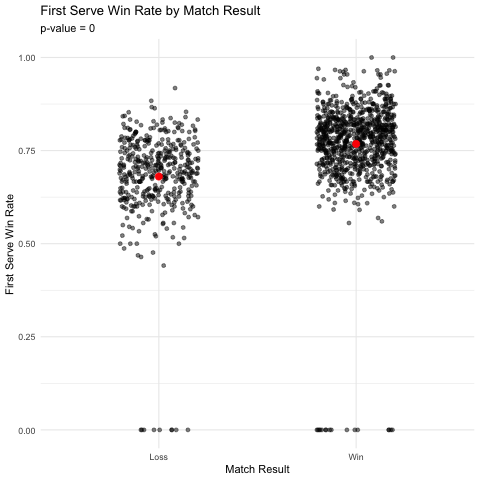

In [159]:
%%R

t_result <- t.test(rate_1stWon ~ result, data = df)
print(t_result)

# Simple dot plot
ggplot(df, aes(x = factor(result, labels = c("Loss", "Win")), y = rate_1stWon)) +
  geom_jitter(width = 0.2, alpha = 0.5) +
  stat_summary(fun = mean, geom = "point", size = 3, color = "red") +
  labs(title = "First Serve Win Rate by Match Result",
       subtitle = paste("p-value =", round(t_result$p.value, 4)),
       x = "Match Result",
       y = "First Serve Win Rate") +
  theme_minimal()

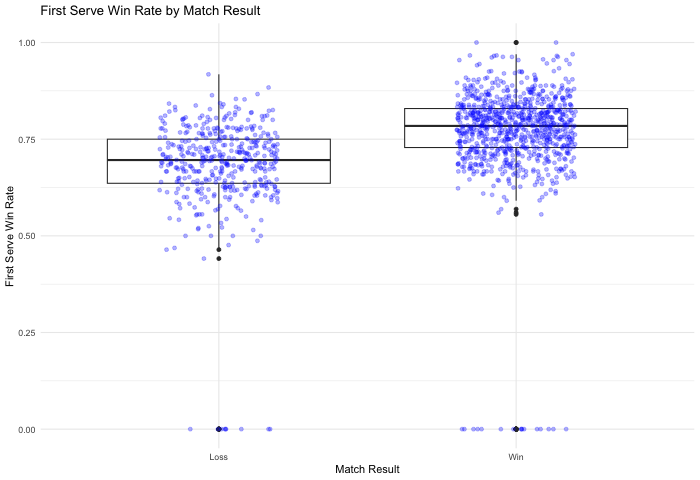

In [162]:
%%R -w 700

ggplot(df, aes(x = factor(result, labels = c("Loss", "Win")), y = rate_1stWon)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, alpha = 0.3, color = "blue") +
  labs(title = "First Serve Win Rate by Match Result",
       x = "Match Result",
       y = "First Serve Win Rate") +
  theme_minimal()
